# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,51,35
1,80,53
2,23,5
3,83,93
4,64,33


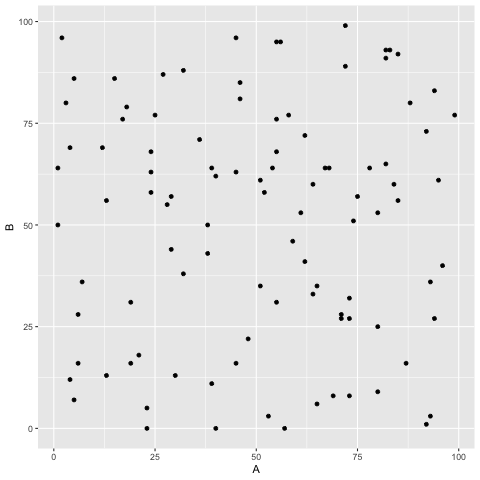

In [5]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [6]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [7]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




In [8]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

plot_continuous

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

R[write to console]: Error in withVisible({ : object 'plot_continuous' not found

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: package ‘tidyverse’ was built under R version 4.1.2 

R[write to console]: 2: package ‘ggplot2’ was built under R version 4.1.2 

R[write to console]: 3: package ‘tibble’ was built under R version 4.1.2 

R[write to console]: 4: package ‘tidyr’ was built under R version 4.1.2 

R[write to console]: 5: package ‘readr’ was built under R version 4.1.2 

R[write to console]: 6: package ‘purrr’ was built under R version 4.1.2 

R[write to console]: 7: package ‘dplyr’ was built under R version 4.1.2 

R[write to console]: 8: package ‘stringr’ was built under R version 4.1.2 

R[write to console]: 9: package ‘forcats’ was built under R version 4.1.2 

R[write to console]: 10: The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.
This warning is displaye


Error in withVisible({ : object 'plot_continuous' not found


RInterpreterError: Failed to parse and evaluate line '\ncontinuous_variables <- c(\'mpg\', \'disp\', \'hp\', \'drat\', \'wt\', \'qsec\')\ndiscrete_variables   <- c(\'vs\', \'am\', \'gear\', \'carb\')\n\n# Conevert to long format\nmtcars_long = mtcars %>% pivot_longer(!name, names_to = \'variable\', values_to = \'value\') \n\n# plot only continuous variables\nto_plot <- mtcars_long %>% filter(variable %in% continuous_variables)\n\nhistogram_means <- to_plot %>%\n  group_by(variable) %>%\n  summarise(mean = mean(value))\n\nplot_continuous_histograms <- ggplot(to_plot) +\n    aes(x=value, fill=variable, group=variable) +\n    geom_histogram(bins=5) +\n    geom_vline(data=histogram_means, aes(xintercept=mean)) +\n    facet_wrap(~variable, scales=\'free\') +\n    theme_minimal() +\n    labs(title = \'mtcars at a glance\', subtitle=\'continuous variables (means marked with a vertical line)\')\n\n\nplot_continuous_dotplot <- ggplot(to_plot) +\n    aes(x=value, y=1, color=variable) +\n    geom_point(size=4, alpha=.2) +\n    stat_summary(fun.y= mean, geom="point", shape=\'x\',\n                 size=10, color="black", alpha=1, orientation=\'y\') +\n    facet_wrap(~variable, scales=\'free\', ncol=1) +\n    theme_minimal() +\n    labs(\n        title = \'mtcars at a glance\', \n        subtitle=\'continuous variables (means marked with an X)\'\n    ) +\n    theme(\n            axis.text.y=element_blank(),  #remove y axis labels\n            axis.ticks.y=element_blank(),  #remove y axis ticks\n            panel.grid.major.y = element_blank(), #remove y axis grid\n            panel.grid.minor.y = element_blank(), #remove y axis grid\n    )\n\nplot_continuous\n\n# display both plots\nprint(plot_continuous_histograms)\nprint(plot_continuous_dotplot)\n'.
R error message: "Error in withVisible({ : object 'plot_continuous' not found"

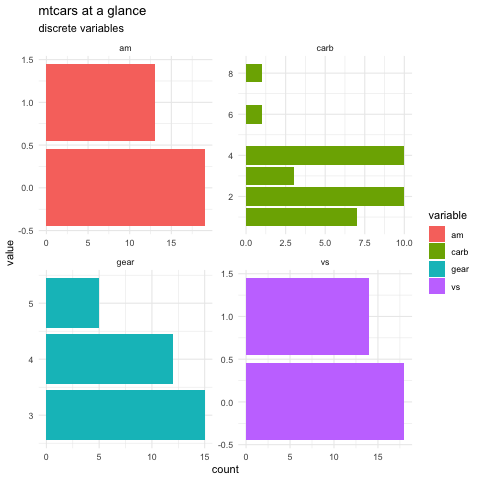

In [9]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

# answer here
Most of the cars in these datas have 3 or 4 gears, and equal to less than 4 carbs.

👉 What can we not conclude about this dataset from the charts above?

# answer here
We cannot conclude on anything not being shown in these four charts, meaning we don't know anything that is not about the distribution of the four categories.

👉 What further questions about this data do you have now? 

# answer here
What does am and vs stands for? Do 3 speed vehicles also tend to have 4 carbs?

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


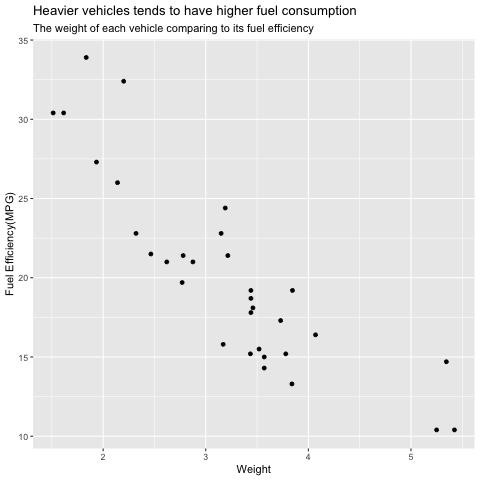

In [13]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    xlab("Weight") +
    ylab("Fuel Efficiency(MPG)") +
    labs(
       title="Heavier vehicles tends to have higher fuel consumption",
       subtitle = "The weight of each vehicle comparing to its fuel efficiency",
   ) +
    geom_point()

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    b. What can't we conclude about fuel efficiency and weight

    c. What further questions do you have about this data?

a. Heavier vehicle commonly leads to worse fuel efficiency.

b. We cannot guarantee that selecting two random vehicles, the heavier one is always less oil efficient.

c. What other factors influence the fuel consumption of the vehicles?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


`geom_smooth()` using formula = 'y ~ x'


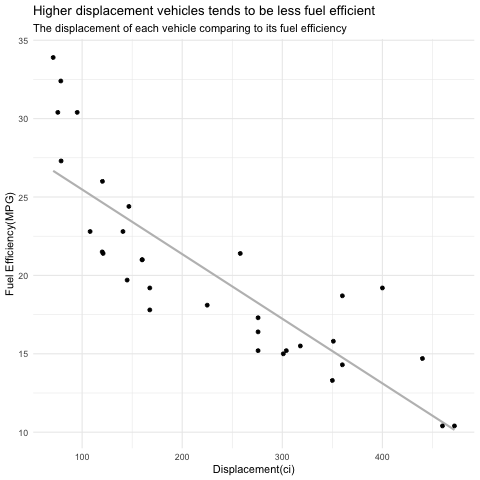

In [76]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    aes(y=mpg, x=disp) +
    xlab("Displacement(ci)") +
    ylab("Fuel Efficiency(MPG)") +
    labs(
       title="Higher displacement vehicles tends to be less fuel efficient",
       subtitle = "The displacement of each vehicle comparing to its fuel efficiency",
   ) +
    geom_smooth(method = "lm", se = FALSE, color = "gray")+
    geom_point()

`geom_smooth()` using formula = 'y ~ x'


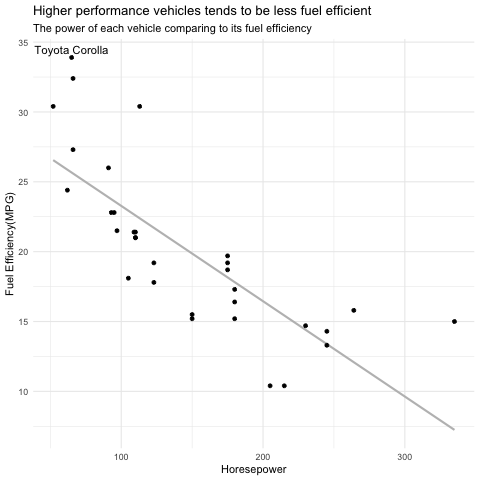

In [75]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    aes(y=mpg, x=hp) +
    xlab("Horesepower") +
    ylab("Fuel Efficiency(MPG)") +
    labs(
       title="Higher performance vehicles tends to be less fuel efficient",
       subtitle = "The power of each vehicle comparing to its fuel efficiency",
   ) +
    geom_smooth(method = "lm", se = FALSE, color = "gray")+
    geom_point() +
    geom_text(aes(label = ifelse(mpg == max(mpg), name, "")), vjust = -0.5, size = 4)

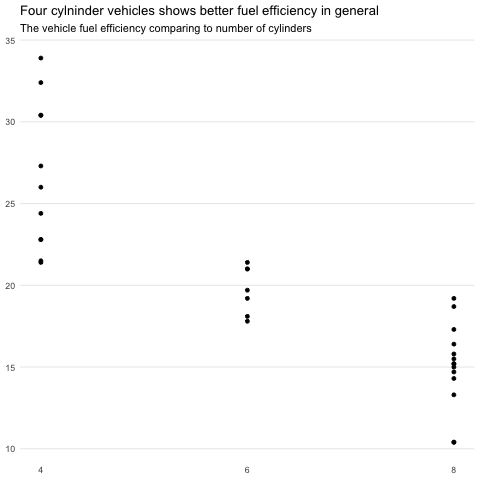

In [80]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    theme(
        legend.position="none",
         axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
    ) +
    aes(y=mpg, x=cyl) +
    xlab("Displacement(ci)") +
    ylab("Fuel Efficiency(MPG)") +
    labs(
       title="Four cylninder vehicles shows better fuel efficiency in general",
       subtitle = "The vehicle fuel efficiency comparing to number of cylinders",
   ) +
    geom_point() +
    scale_x_continuous(breaks = c(4, 6, 8))

`geom_smooth()` using formula = 'y ~ x'


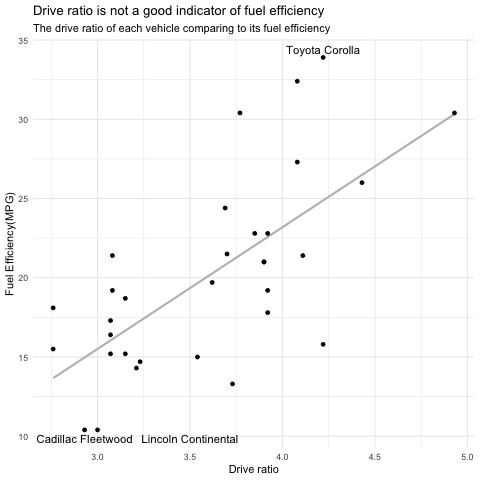

In [74]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    aes(y=mpg, x=drat) +
    xlab("Drive ratio") +
    ylab("Fuel Efficiency(MPG)") +
    labs(
       title="Drive ratio is not a good indicator of fuel efficiency",
       subtitle = "The drive ratio of each vehicle comparing to its fuel efficiency",
   ) +
    geom_smooth(method = "lm", se = FALSE, color = "gray")+
    geom_point()+
    geom_text(aes(label = ifelse(mpg == min(mpg), name, "")), vjust = 1.5, size = 4,  nudge_x = c(0, 0.5)) +
    geom_text(aes(label = ifelse(mpg == max(mpg), name, "")), vjust = -0.5, size = 4)

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

What factors can give a car a better quarter mile time?

### 👉 Charts or summary statistics to help answer your question

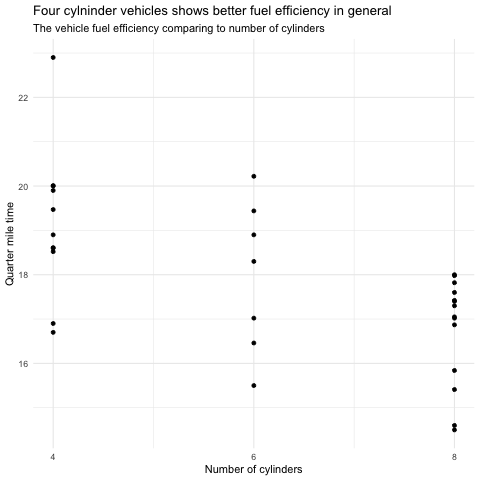

In [99]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    aes(y=qsec, x=cyl) +
    xlab("Number of cylinders") +
    ylab("Quarter mile time") +
    labs(
       title="Four cylninder vehicles shows better fuel efficiency in general",
       subtitle = "The vehicle fuel efficiency comparing to number of cylinders",
   ) +
    geom_point() +
    scale_x_continuous(breaks = c(4,6,8))

`geom_smooth()` using formula = 'y ~ x'


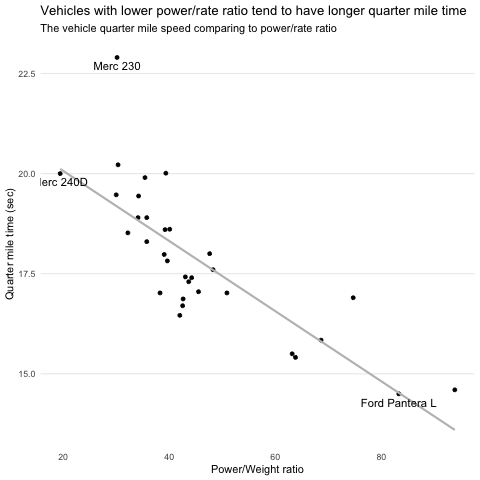

In [100]:
%%R

ggplot(mtcars) +
    theme_minimal() + 
    theme(
        legend.position="none",
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
    ) +
    aes(y=qsec, x=hp/wt) +
    xlab("Power/Weight ratio") +
    ylab("Quarter mile time (sec)") +
    labs(
       title="Vehicles with lower power/rate ratio tend to have longer quarter mile time",
       subtitle = "The vehicle quarter mile speed comparing to power/rate ratio",
   ) +
    geom_point()+
    geom_smooth(method = "lm", se = FALSE, color = "gray")+
    geom_text(aes(label = ifelse(qsec == min(qsec), name, "")), vjust = 1.5, size = 4) +
    geom_text(aes(label = ifelse(qsec == max(qsec), name, "")), vjust = 1.5, size = 4) +
    geom_text(aes(label = ifelse(hp/wt == min(hp/wt), name, "")), vjust = 1.5, size = 4)

### 👉 Reflection

a. What can we conclude?

Vehicle with higher power/weight ratio tends to have faster quarter mile time. 

b. What can't we conclude?

Given two vehicles, the vehicle with lower power weight ratio is guaranteed to have faster quarter mile time.

c. What further questions does this analysis raise?

What make of cars tends to have better quarter mile times? Are Mercedes vehicles exceptionally slow?
